# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 8</center>

# <center>Non-Linear Regression</center>

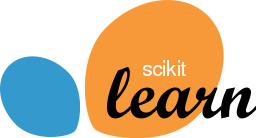

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Polynomial regression to implement non-linear models. Use regularization concepts to overcome overfitting problem in machine learning.

By the end of the lab, you should be able to :
- Differentiate overfitting and underfitting issues in machine learning.


- Implement polynomial features to apply non-linear models and overcome underfitted models.


- Implment regularization to overcome overfitted models.




## <font color = blue>1. Loading Data

    - Lets load boston housing data set for this problem.
    

In [41]:
#import libraries first
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression


In [42]:
#Load datasets
boston = load_boston()
boston.keys()


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [43]:
ndf = pd.DataFrame(boston.data, columns=boston.feature_names)
ndf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [44]:
ndf['target'] = boston.target
ndf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## <font color = blue> 2. Train test split


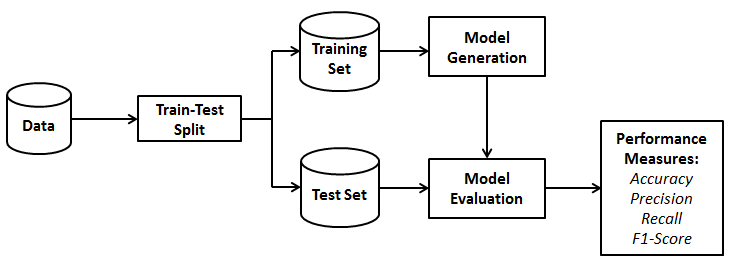

1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`


### <font color = "7DCE13">To simplify the model and to visualize data distribution in two dimensional space, lets consider only one feature first.

In [45]:
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
x = ndf[['LSTAT']] 
y = boston.target

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)
x_train, x_test

(     LSTAT
 33   18.35
 283   3.16
 418  20.62
 502   9.08
 402  20.31
 ..     ...
 486  14.98
 189   5.39
 495  17.60
 206  10.97
 355   5.57
 
 [404 rows x 1 columns],
      LSTAT
 226   3.13
 292   4.70
 90    8.81
 373  34.77
 273   6.58
 ..     ...
 349   5.89
 212  16.03
 156  16.14
 480  10.74
 248   9.52
 
 [102 rows x 1 columns])

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

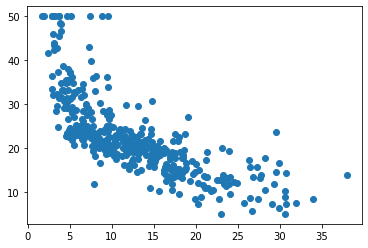

In [47]:
#Lets plot scatter plot to check relation in two dimensional space.
plt.scatter([x_train],y_train)
plt.show()


## <font color=blue> 3. Train Simple Linear Model    

### <font color="green"> 3.1. Create and Train model 
    
- Lets create simple Linear Regression model

In [48]:
#create model
lr = LinearRegression()

#train the model by fitting data
lr.fit(x_train, y_train)
lr

LinearRegression()

### <font color="green"> 3.2. Test Model 
- Testing or evaluating a machine learning model is a crucial step in machine workflow. It allows machine learning engineer to discover underfitting and overfitting problem in the trained model.


In [49]:
#lets find predicted value for trained data

y_pred = lr.predict(x_train)
y_pred

array([16.89337179, 31.77671085, 14.66919933, 25.97622584, 14.97294094,
       31.67872968, 27.59291507, 22.48809634, 27.83786799, 23.45810988,
       18.09854013, 26.43673732, 17.50085502,  7.63415164, 21.17514873,
       16.45245654, 18.11813636, 22.62526998, 25.77046539, 28.53353426,
       28.259187  , 22.69385679, 26.61310342, 27.35776028, 21.91980558,
       17.3146908 , 24.78085562, 31.96287506, 32.9916773 , 24.58489329,
       13.20927996, 16.78559251, 14.21848597, 22.3999133 , 17.09913224,
        7.16384204, 28.27878323, 30.27759901, 23.38952307, 20.1561446 ,
       23.41891742, 25.10419347, 28.38656251, 26.17218817, 29.99345363,
       21.9883924 , 22.85062666, 30.00325175, 13.98333117, 31.97267318,
       11.37703216, 13.78736884, 27.28917346, 30.16002161, 17.17751717,
       29.09202691, 31.99226941, 28.64131355, 17.7850004 , 30.40497453,
        4.68491855, 30.37558018, 29.18020996, 19.43108398, 20.36190505,
       12.07269844, 29.48395157, 27.89665669, 23.8794289 , 20.51

In [50]:
y_test

array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

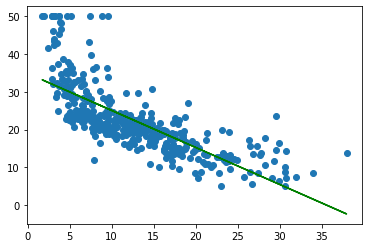

In [51]:
#lets plot prediction line
plt.scatter(x_train, y_train)
x_train = np.array(x_train).reshape(-1,1)
plt.plot(x_train, y_pred, color ='green')
plt.show()


In [52]:
#Lets check model's r2 score for train data
from sklearn.metrics import r2_score
r2_score(y_pred, y_train)



0.18939635081751716

In [53]:
lr.score(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.5523019908037391

In [54]:
# lets ckeck model's r2 score for test data

y_pred1 = lr.predict(x_test)
r2_score(y_pred1, y_test)


0.2796218154966078

In [55]:
lr.score(x_test, y_test)

0.5041523728903132

### <font color = "7DCE13"> Problem: We noticed that both models' train accuracy, as well as test accuracy, is very low. Such a situation is also called High Bias or Underfitting. 
    
### <font color = "7DCE13"> Underfitting occurs when the model fails to capture the relationship between input and output features due to a lack of enough features to capture the pattern.
    
### <font color = "7DCE13"> Solution?
    - Increase Number of Features
    
    - Increase Model's Complexity(Apply polynomial Features)


## <font color=blue> 4. Train Non-Linear Model (Polynomial regression)   

### <font color="green"> 4.1. Create Polynomial Features 


In [56]:
from sklearn.preprocessing import PolynomialFeatures
#create PolynomialFeatures Features
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
x_train_poly
# X_train_poly = poly_features.fit_transform(x.reshape(-1, 1))
# model2 = LinearRegression()
# model2.fit(x_train_poly,y)



array([[  1.    ,  18.35  , 336.7225],
       [  1.    ,   3.16  ,   9.9856],
       [  1.    ,  20.62  , 425.1844],
       ...,
       [  1.    ,  17.6   , 309.76  ],
       [  1.    ,  10.97  , 120.3409],
       [  1.    ,   5.57  ,  31.0249]])

### <font color="green"> 4.2. Train Non-linear Model (Polynomial Regression)


In [57]:
#lets create model first
polylr = LinearRegression()


#train the model
polylr.fit(x_train_poly, y_train)




LinearRegression()

### <font color="green"> 4.3. Test Non-Linear Model 


In [58]:
#find Predicted value for non-linear Model
y_poly_pred = polylr.predict(x_train_poly)
y_poly_pred



array([14.63462496, 35.97773339, 13.22907096, 25.18955836, 13.39367027,
       35.76930438, 27.87927372, 20.22113697, 28.30818651, 21.48828361,
       15.58999642, 25.93075668, 15.09917121, 11.83734121, 18.64654209,
       14.31912702, 15.60665619, 20.39497314, 24.86481218, 29.55697821,
       29.05907767, 20.48255288, 26.21988614, 27.47281072, 19.51975512,
       14.95313287, 23.35840011, 36.37622859, 38.63704305, 23.07099332,
       12.55865146, 14.55581983, 13.00076967, 20.11031688, 14.78809583,
       11.90979668, 29.09440794, 32.88724889, 21.39578868, 17.53587931,
       21.43537535, 23.84049372, 29.28936807, 25.50253131, 32.32522751,
       19.60279777, 20.68439154, 32.34448153, 12.88921778, 36.39729204,
       12.00006467, 12.80021882, 27.35523575, 32.6537701 , 14.84760518,
       30.59236922, 36.43944595, 29.75451297, 15.32833733, 33.1416471 ,
       12.63446855, 33.08280479, 30.75852566, 16.80488832, 17.75230237,
       12.17507749, 31.33642361, 28.41196278, 22.06614405, 17.91

In [59]:
ydf = pd.DataFrame(x_train_poly, columns = ['Feature_0','Feature_1','Feature_2'])
# ydf = pd.DataFrame(x_train_poly, poly_features.get_feature_names.out())
ydf.head()

Feature_0  Feature_1  Feature_2
0        1.0      18.35   336.7225
1        1.0       3.16     9.9856
2        1.0      20.62   425.1844
3        1.0       9.08    82.4464
4        1.0      20.31   412.4961

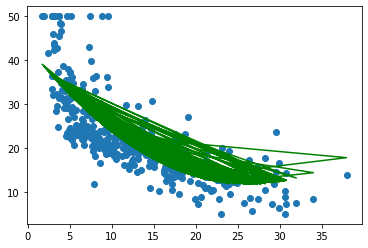

In [60]:
#I want to plot prediction line for non-linear model. Lets create dataframe out of POlynomial Features
#Lets add dummy features names
plt.scatter(x_train, y_train)
plt.plot(x_train, y_poly_pred, color='green')
plt.show()



In [61]:
#Lets add predicted output as new col in the dataframe

ydf['y_poly_pred'] = y_poly_pred
ydf.head()


Feature_0  Feature_1  Feature_2  y_poly_pred
0        1.0      18.35   336.7225    14.634625
1        1.0       3.16     9.9856    35.977733
2        1.0      20.62   425.1844    13.229071
3        1.0       9.08    82.4464    25.189558
4        1.0      20.31   412.4961    13.393670

In [81]:
#LEts sort the dataframe to get continuous prediction line
ydf.sort_values(by=['Feature_1'], inplace = True )
ydf.head()



Feature_0  Feature_1  Feature_2  y_poly_pred
84         1.0       1.73     2.9929    39.056747
28         1.0       1.92     3.6864    38.637043
307        1.0       2.47     6.1009    37.440429
213        1.0       2.87     8.2369    36.587268
386        1.0       2.88     8.2944    36.566124

In [80]:
ndf.shape

(506, 14)

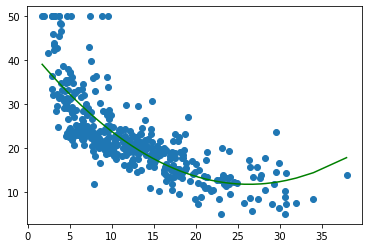

In [63]:
#lets plot the prediction line
plt.scatter(x_train, y_train)
plt.plot(ydf.Feature_1, ydf.y_poly_pred, color = 'green')
plt.show()


In [64]:
#Lets check train score
polylr.score(x_train_poly, y_train)


0.6411591817537179

In [65]:
#Lets Check Test Score

polylr.score(x_test_poly, y_test)

0.6368350327760268

### <font color = "7DCE13"> Takeaway: We noticed that model performance is better than Simple Linear Model. In other word, model performance is improving as we increase model's complexity. Lets try adding more features.
    


## <font color = blue>5. Increasing Features
    
   - Lets choose all the Features availabe in boston housing dataset and add non-linear model with 2 degree polynomial features.


### <font color="green"> 5.1. Add more features


In [67]:
#Lets create new X, y remains same

xm =ndf
y=boston.target

### <font color="green"> 5.2. Split new data for train and test


In [68]:
# from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(xn, y, test_size=0.2, random_state=5)

### <font color="green"> 5.3. Apply Polynomial Features to new features


In [69]:
#create PolynomialFeatures Features
poly =PolynomialFeatures(degree =2)
x_train1_poly = poly.fit_transform(x_train1)
x_test1_poly = poly.fit_transform(x_test1)
x_train1_poly.shape



(404, 120)

### <font color="green"> 5.4. Train model


In [70]:
#create model 
plr = LinearRegression()
plr.fit(x_train1_poly, y_train1)



LinearRegression()

In [30]:
y_hat_poly = plr.predict(x_train1_poly)
y_hat_poly

array([13.1, 50. ,  8.8, 20.6, 12.1, 50. , 24.1, 16.1, 23.9, 24.3, 13.1,
       30.3, 15.2, 13.8, 26.4, 16.6, 18.9, 17.6, 18.7, 33.4, 20.7, 17.1,
       23.4, 26.5, 21.4, 21.5, 19.2, 50. , 50. , 23. , 10.5, 17.8, 10.9,
       21. , 13.8, 10.5, 22.2, 30.5, 19.4, 15.6, 20.2, 19.3, 34.6, 50. ,
       24. , 18.7, 19.8, 22.5, 13.3, 50. , 11.8, 11. , 23.7, 35.4, 15.2,
       24.4, 33.4, 31.6, 13.4, 34.9, 14.4, 35.4, 25.3, 18.3, 16.6, 13.4,
       23.6, 27.5, 22.2, 17.7, 14.3, 21.7,  8.4, 15.3, 20.3, 32. , 20. ,
       19.1, 28.7, 46. , 22.6, 23.9, 21.9, 15.6, 50. , 25. , 37.9, 21.6,
       19.3, 17.5, 22.9, 15. , 27.5, 10.2, 23.8, 23.9, 20.1, 16.5, 33.1,
       14.6, 28.4, 23.7, 12.3, 31.5, 22. , 12.5, 35.1, 14.9, 22.9, 22.9,
       19.3, 19.8, 20. , 29.6, 20.5, 29. , 20.7, 19.9, 11.9,  5. , 23.3,
       20.6, 22.9, 19.6, 14.1, 30.8, 43.1, 19.9, 13.9, 22.3, 14.3, 23.9,
       16. , 20.5, 10.2, 20.1, 12.8, 18.9, 22. , 20.4, 17.5, 13.1, 22. ,
       45.4, 18.8, 20. , 20.1, 21.4, 17.4, 21.1, 28

### <font color="green"> 5.4. Test model


In [71]:
#Check train score
plr.score(x_train1_poly, y_train1)

1.0

In [72]:
#check test score
plr.score(x_test1_poly, y_test1)


1.0

### <font color = "7DCE13"> Takeaway: We noticed that training accuracy has improved from 60% to 93 percent. However, we see test accuracy is very low compared to train accuracy. Such situation is called as overfitting or High Variance.
    
    
Solution?
    
    - Feature Selection
    
    - Increasing Training samples
    
    - Regularization


## <font color=blue> 6. Regularization
    

### <font color="green"> 6.1. Ridge (L2 Regularization)

`class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)`

In [74]:
from sklearn.linear_model import Ridge
#create model
modelr = Ridge(alpha = 1000000)


#train the model
modelr.fit(x_train1_poly, y_train1)


#Find the train score

modelr.score(x_train1_poly,y_train1)

0.9974090007260168

In [40]:
#Find test Score
modelr.score(x_test1_poly,y_test1)



0.9947620622881549

### <font color="green"> 6.1. Lasso (L1 Regularization)

    
`class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')`

In [76]:
from sklearn.linear_model import Lasso
#create model
modelL = Lasso(alpha = 0.10) 

#Train model
modelL.fit(x_train1_poly, y_train1)

#find train score
modelL.score(x_train1_poly, y_train1)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.192e+01, tolerance: 3.470e+00
  model = cd_fast.enet_coordinate_descent(


0.9993630716809682

In [36]:
#Find test score for Lasso Model
modelL.score(x_test1_poly, y_test1)



0.9986381183812828

### <font color = "7DCE13"> Takeaway: After applying Regularization to our model, we can bring our train score and test score almost equal to each other. With this technique we are able to overcome the overfitted model. However, the choice of lamda value is very important.


Feature Selection
